In [1]:
%matplotlib inline

In [2]:
fn = 'heights_sequoias.csv'

In [3]:
import pandas as pd
df = pd.read_csv(fn, index_col='age')

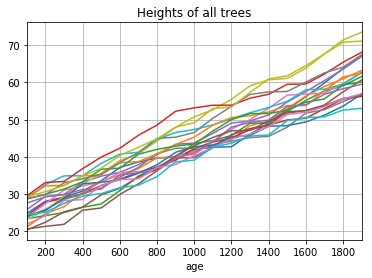

In [5]:
df.plot(legend=False, grid=True, title='Heights of all trees')

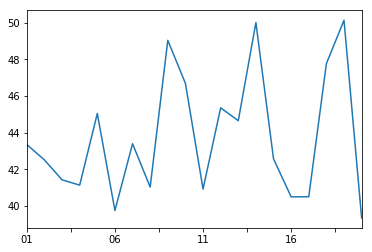

In [9]:
# by default, the mean is computed along the columns
#
# in this example, this would compute each tree's average height
# over its entire lifespan:
mean_per_tree = df.mean()
mean_per_tree.plot()

In [13]:
# we are interested in the mean along the rows, i.e. the height
# of an 'average' sequoia tree at each age
#
# we can specify this with the 'axis' parameter:
mean_per_age = df.mean(axis=1)
mean_per_age

age
100     25.140638
200     27.458689
300     29.359019
400     31.436227
500     33.349845
600     35.775022
700     37.663448
800     40.039922
900     42.434572
1000    43.887705
1100    46.077663
1200    48.043171
1300    50.036204
1400    51.472192
1500    53.780362
1600    55.483501
1700    57.577000
1800    60.146978
1900    62.189838
dtype: float64

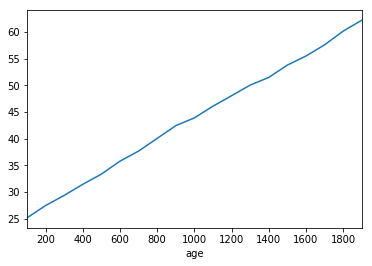

In [14]:
mean_per_age.plot()

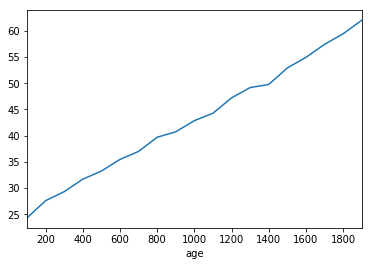

In [15]:
df.median(axis=1).plot()

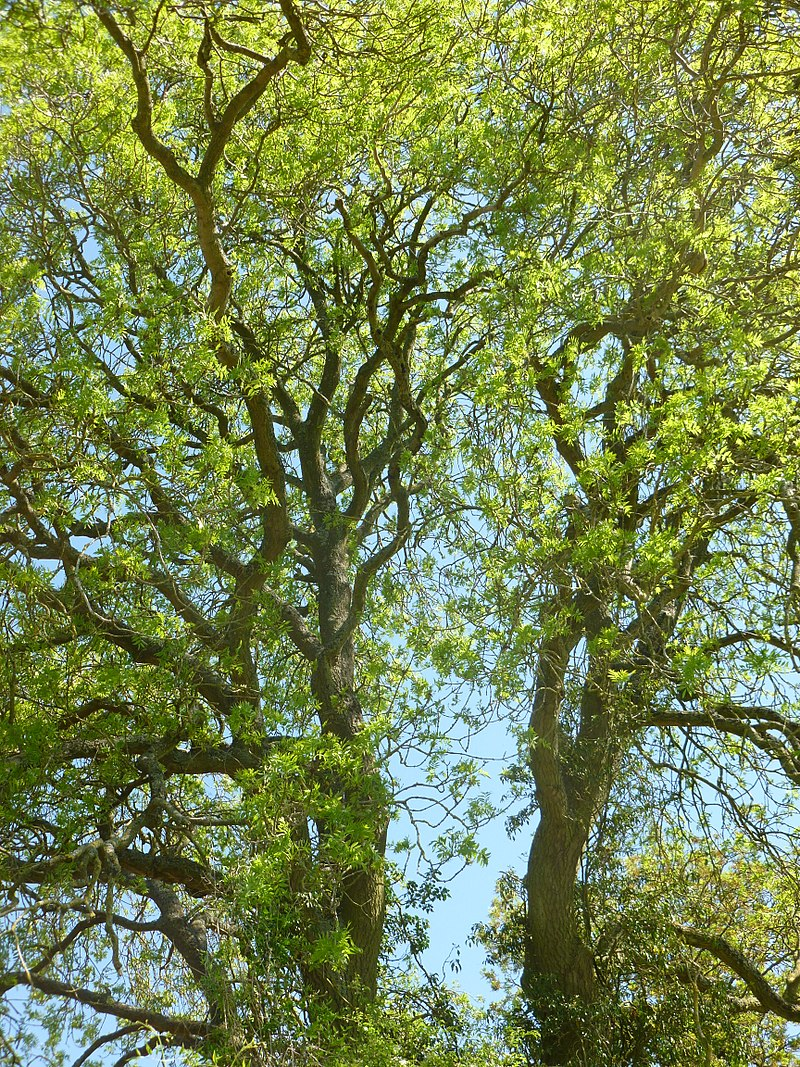

In [19]:
# For this simple dataset, there is hardly any difference between
# mean and median. The reason is that all growth rates are distributed
# symmetrically around an average.
#
# Now let's create a more interesting dataset that contains two
# different kinds of trees, ashes and beeches:
# 
# Ashes look like this
# https://commons.wikimedia.org/wiki/Category:Fraxinus#/media/File:The_Glory_of_Ash_(9052833052).jpg
from IPython.display import Image
Image('ash.jpg')

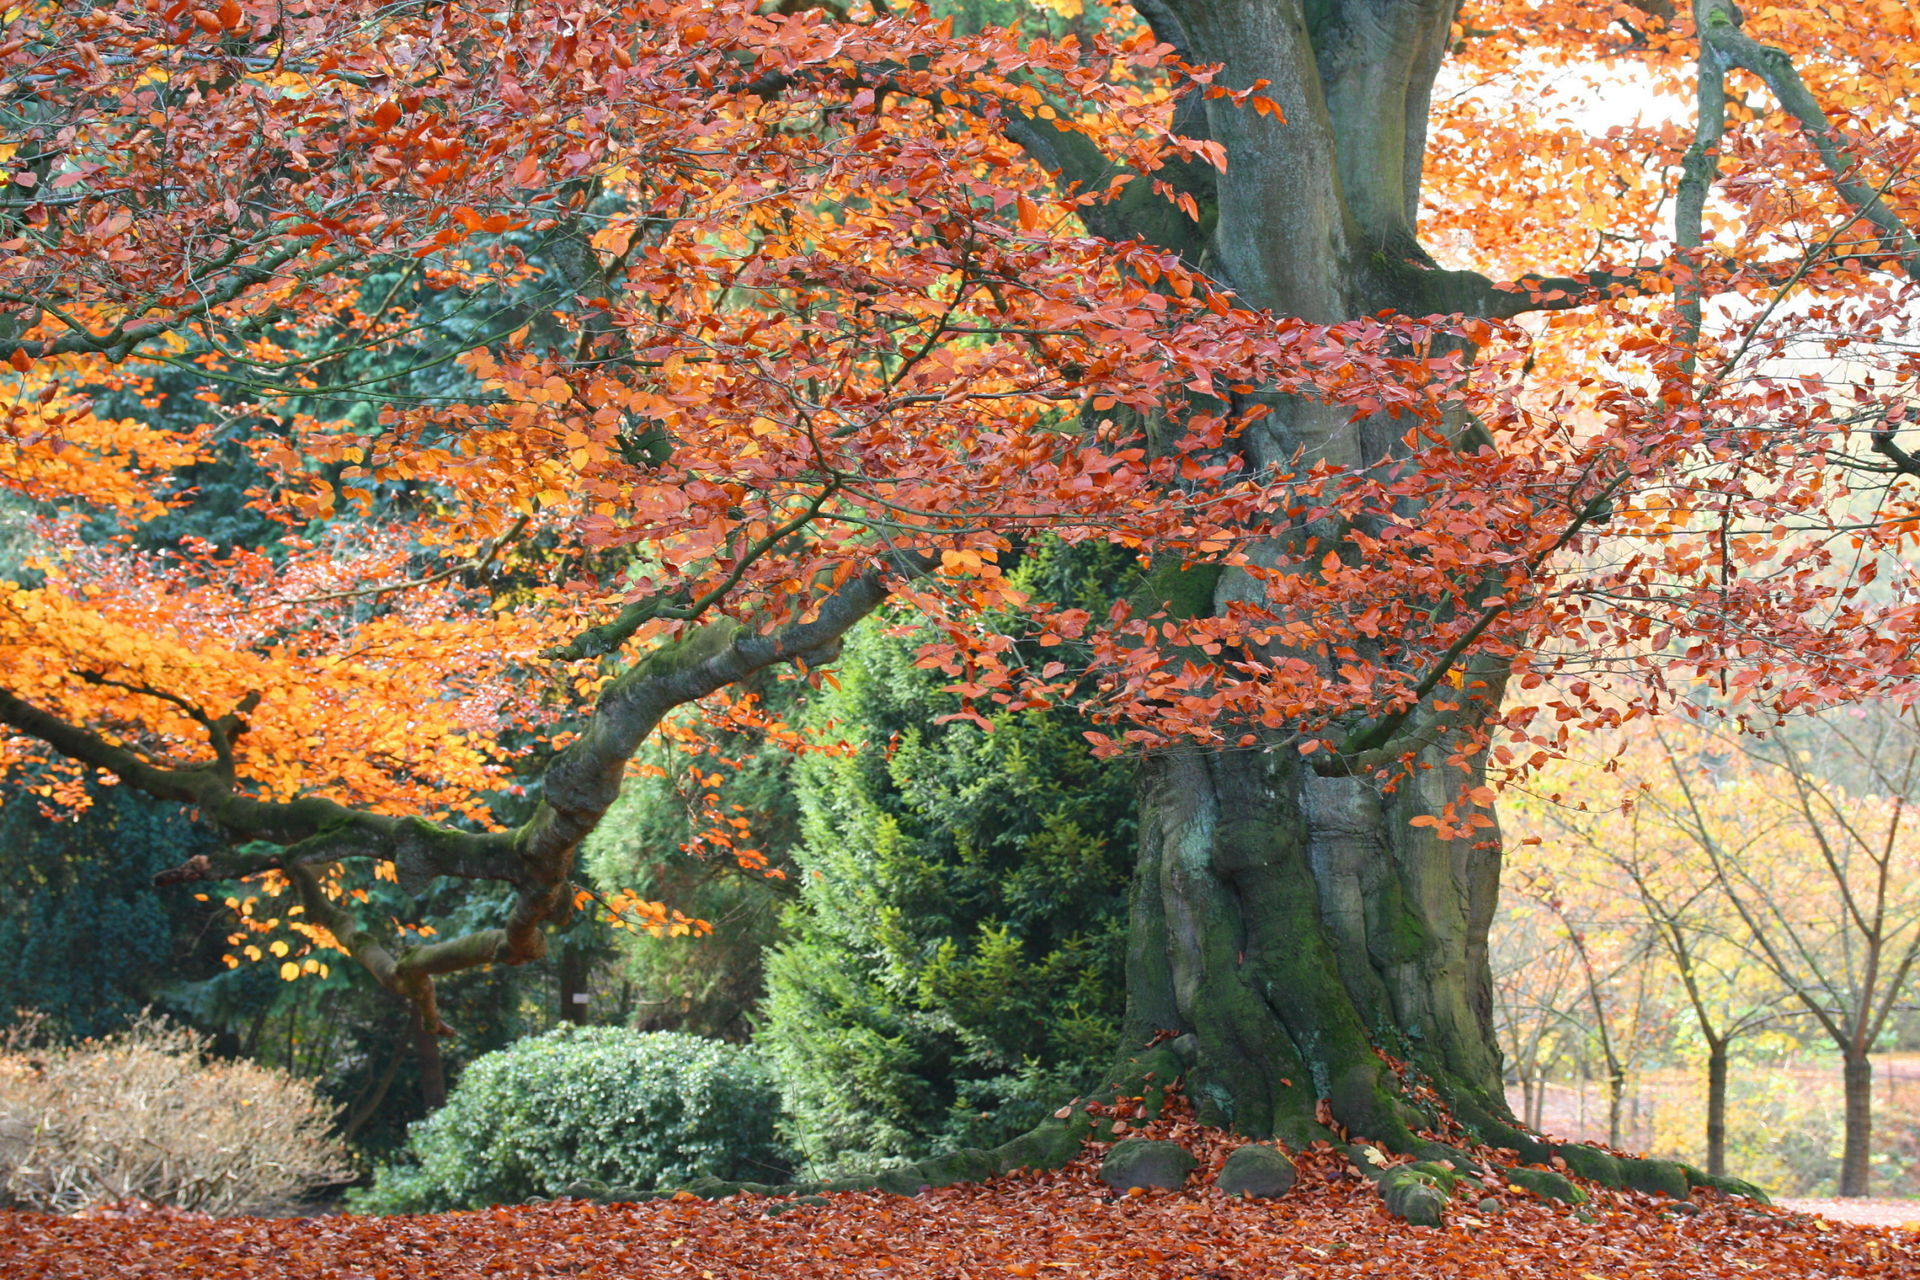

In [21]:
# and beeches look like this:
# https://en.wikipedia.org/wiki/Beech#/media/File:Fagus_sylvatica_Purpurea_JPG4a.jpg
Image('beech.jpg')

In [76]:
# let's generate some growth rates (we are not botanists, so we are just making up some
# numbers here)
import numpy as np
na, nb = 20, 15
years = range(20, 220, 10)
ny = len(years)
growth_a = np.random.lognormal(mean=1., sigma=2., size=(ny, nb))
growth_b = np.random.uniform(low=15., high=25., size=(ny, nb))

In [77]:
# the growth says how much every tree increases in height per year.
# In order to get the heights themselves, we need to form the cumulative sums:
heights_a = np.cumsum(growth_a, axis=0)
heights_b = np.cumsum(growth_b, axis=0)

In [28]:
# Finally we copy all our data into two pandas data frames (one for the ashes and one
# for the beeches). Normally we would read them from e.g. a CSV file via pandas.read_csv().
# But this is not necessary when we generate our fake data in Python:

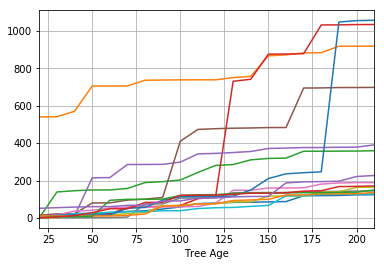

In [78]:
yrs = pd.Series(years, name='Tree Age')
df_ashes = pd.DataFrame(data=heights_a, index=yrs)
df_ashes.plot(legend=False, grid=True)

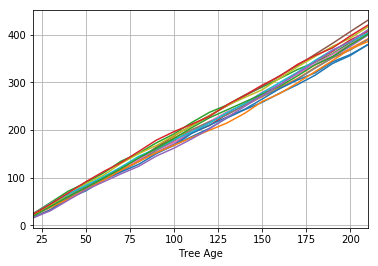

In [79]:
df_beeches = pd.DataFrame(data=heights_b, index=yrs)
df_beeches.plot(legend=False, grid=True)

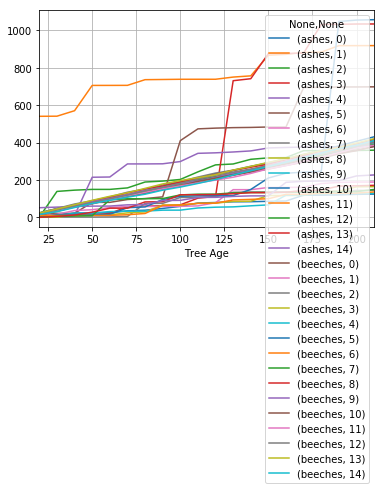

In [80]:
# Let's put the data of the ashes and beeches together in one big
# Pandas dataframe. We add keys so that we remember which trees are
# which. This is a common way of comparing two (or more) groups against
# each other.
# 'axis=1' means that we concatenate the two data frames horizontally
# (like adding more columns to an Excel spreadsheet)
df_trees = pd.concat([df_ashes, df_beeches], axis=1, keys=['ashes', 'beeches'])
df_trees.plot(legend=True, grid=True)

In [81]:
# We get a much better overview if we group data by the keys. groupby() creates
# a helper object that helps us to analyze the two subgroups and compare them.
# If you are interested in details, have a look at the official tutorials:
# https://pandas.pydata.org/pandas-docs/stable/tutorials.html
gb = df_trees.groupby(axis=1, level=0)
compare_means = gb.mean()
compare_means

,ashes,beeches
Tree Age,,
20,42.840609,20.545504
30,55.683546,40.130733
40,64.210847,60.614348
50,92.746485,79.790478
60,101.986665,100.119819
70,116.046310,119.907176
80,128.972018,139.214697
90,140.767565,159.870720
100,170.552947,178.462487


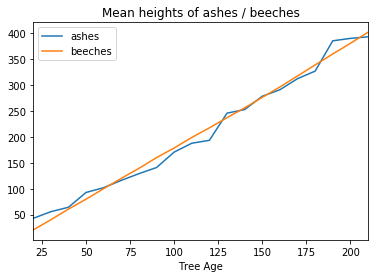

In [82]:
compare_means.plot(title='Mean heights of ashes / beeches')

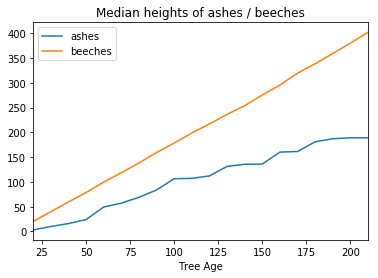

In [83]:
gb.median().plot(title='Median heights of ashes / beeches')

In [84]:
summary_stats = pd.concat([gb.min(), gb.median(), gb.mean(), gb.max()], 
                          axis=1,
                          keys=['minimum','median','mean','max'])

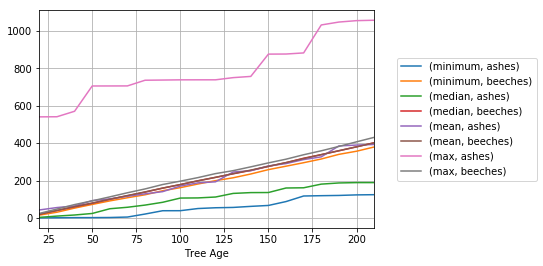

In [90]:
summary_stats.plot(grid=True, legend=False)
import matplotlib.pyplot as plt
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))